## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import re
from sklearn.model_selection import train_test_split

In [ ]:
FA = "4"

DATA_PATH = ""
TRAIN_PATH = ""
TEST_PATH = ""

SEED = 312
N_TEST = 50

## Data

In [ ]:
df = pd.read_csv(DATA_PATH)

assert not df.isnull().values.any()
assert df['student'].dtype == 'object'
assert df['student'].apply(lambda x: bool(re.fullmatch(r'XYZ25\d{3}', str(x)))).all()
assert df['response'].dtype == 'object'
assert df['score'].dtype == int

df.head()

<Axes: ylabel='Frequency'>

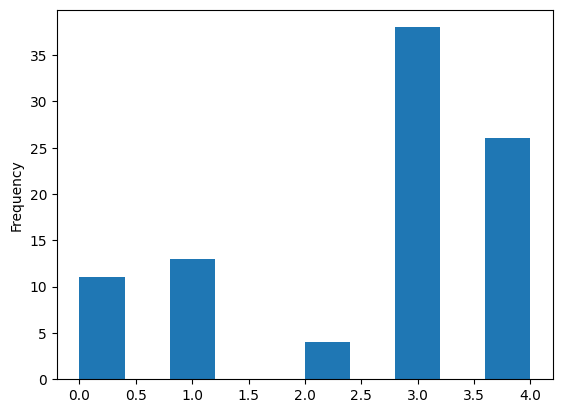

In [5]:
df['score'].plot.hist(bins=10)

## Split

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df,
    test_size=N_TEST,
    stratify=df["score"],
    random_state=SEED
)

## Save

In [7]:
df_train.to_csv(TRAIN_PATH, index=False)
df_test.to_csv(TEST_PATH, index=False)